In [1]:
import pyforest as pyft
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import decomposition
#from hunga_bunga.classification import HungaBungaClassifier, HungaBungaZeroKnowledge, HungaBungaRandomClassifier


In [2]:
dir(pyft)

['ARIMA',
 'CountVectorizer',
 'ElasticNet',
 'ElasticNetCV',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'GridSearchCV',
 'Image',
 'KFold',
 'KMeans',
 'LabelEncoder',
 'Lasso',
 'LassoCV',
 'LazyImport',
 'LinearRegression',
 'LogisticRegression',
 'MinMaxScaler',
 'OneHotEncoder',
 'PCA',
 'Path',
 'PolynomialFeatures',
 'Prophet',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomizedSearchCV',
 'Ridge',
 'RidgeCV',
 'RobustScaler',
 'SimpleImputer',
 'SparkContext',
 'StandardScaler',
 'StratifiedKFold',
 'TSNE',
 'TfidfVectorizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_importable',
 '_imports',
 '_jupyter_labextension_paths',
 '_jupyter_nbextension_paths',
 'active_imports',
 'alt',
 'bokeh',
 'cross_val_score',
 'cv2',
 'dash',
 'dd',
 'dt',
 'fastai',
 'fbprophet',
 'gensim',
 'get_user_symbols',
 'glob',
 'go',
 'import_symbol',
 'imutils',


In [4]:
Customer_Churn_df = pd.read_csv('Churn Modeling.csv')

<IPython.core.display.Javascript object>

In [5]:
Customer_Churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
Customer_Churn_df.drop('RowNumber', axis=1, inplace=True)

In [7]:
Customer_Churn_df.set_index('CustomerId', inplace=True)

In [8]:
Customer_Churn_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
Customer_Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [10]:
print("Dataset Length: ", len(Customer_Churn_df))
for col in Customer_Churn_df.columns:
    print("Unique values for ", col, " ", len(set(Customer_Churn_df[col])))

Dataset Length:  10000
Unique values for  Surname   2932
Unique values for  CreditScore   460
Unique values for  Geography   3
Unique values for  Gender   2
Unique values for  Age   70
Unique values for  Tenure   11
Unique values for  Balance   6382
Unique values for  NumOfProducts   4
Unique values for  HasCrCard   2
Unique values for  IsActiveMember   2
Unique values for  EstimatedSalary   9999
Unique values for  Exited   2


In [11]:
Cat = [col for col in Customer_Churn_df.columns if Customer_Churn_df.columns.dtype == object and len(set(Customer_Churn_df[col]))<5]

In [12]:
Cat

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [13]:
Customer_Churn_df.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

- Which Country has highest customer churn

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

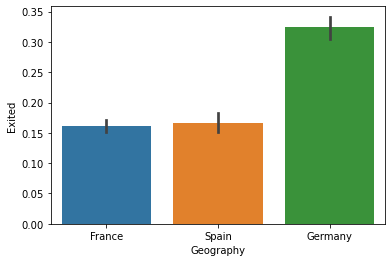

In [14]:
sns.barplot(data = Customer_Churn_df, x = 'Geography', y = 'Exited')

In [15]:
Customer_Churn_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
dir(sns)

<IPython.core.display.Javascript object>

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

In [16]:
Customer_Churn_df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
Customer_Churn_df.Age.isnull().sum()

0

In [19]:
for col in Customer_Churn_df.columns:
    print(col, " : ", Customer_Churn_df[col].isnull().sum())

Surname  :  0
CreditScore  :  0
Geography  :  0
Gender  :  0
Age  :  0
Tenure  :  0
Balance  :  0
NumOfProducts  :  0
HasCrCard  :  0
IsActiveMember  :  0
EstimatedSalary  :  0
Exited  :  0


In [20]:
Customer_Churn_df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
Customer_Churn_df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [22]:
Customer_Churn_df.groupby('Geography').Balance.sum()/1000000

Geography
France     311.332479
Germany    300.402861
Spain      153.123552
Name: Balance, dtype: float64

In [23]:
Customer_Churn_df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [24]:
Customer_Churn_df.CreditScore.unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [25]:
Customer_Churn_df.columns.dtype

dtype('O')

<AxesSubplot:title={'center':'Balance'}, xlabel='Geography'>

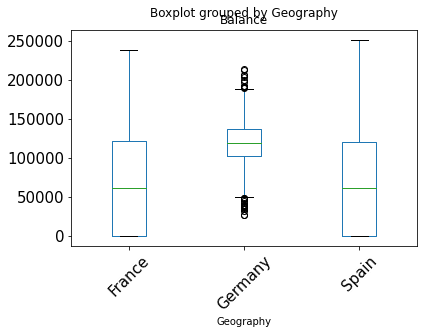

In [26]:
Customer_Churn_df.boxplot(column='Balance', by='Geography', grid=False, rot=45, fontsize=15)

In [27]:
Customer_Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.2+ MB


In [28]:
Customer_Churn_df['Geography'] = pd.Categorical(Customer_Churn_df['Geography'])
Customer_Churn_df['Gender'] = pd.Categorical(Customer_Churn_df['Gender'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
Customer_Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  object  
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  int64   
 9   IsActiveMember   10000 non-null  int64   
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [30]:
Customer_Churn_df.drop(axis=1, columns='Surname', inplace=True)

In [31]:
Customer_Churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<IPython.core.display.Javascript object>

Correlation between various features


<IPython.core.display.Javascript object>

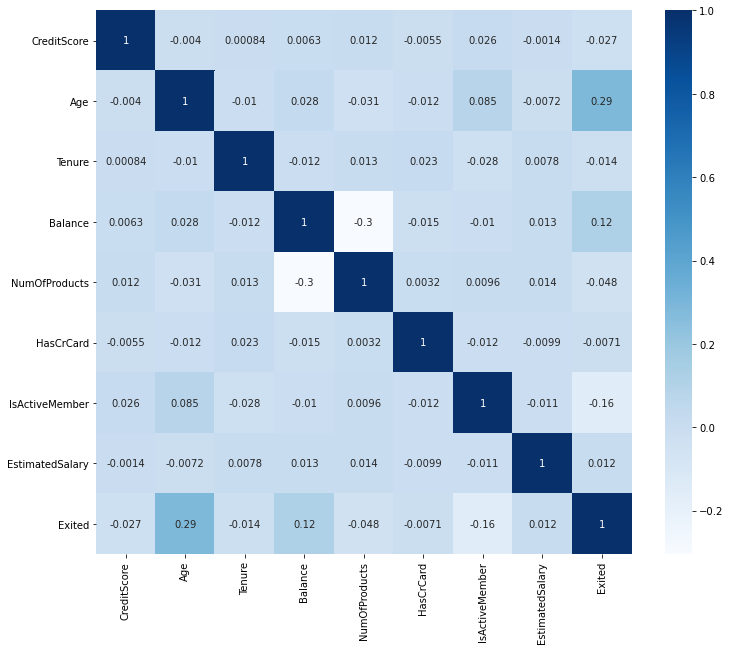

In [34]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(Customer_Churn_df.corr(), annot=True,cmap ='Blues')


In [32]:
y = Customer_Churn_df['Exited']
X = Customer_Churn_df.drop(axis=1, columns='Exited')

In [39]:
X_dum = pd.get_dummies(X, columns=['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])

<IPython.core.display.Javascript object>

In [40]:
X_dum.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
CustomerId,,,,,,,,,,,,,,,,,,,,,
15634602,619,42,0.00,101348.88,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
15647311,608,41,83807.86,112542.58,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
15619304,502,42,159660.80,113931.57,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
15701354,699,39,0.00,93826.63,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
15737888,850,43,125510.82,79084.10,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1


In [44]:
scaler = sklearn.preprocessing.StandardScaler().fit(X_dum)
X_scaled = scaler.transform(X_dum)

<IPython.core.display.Javascript object>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=22)


In [49]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

<IPython.core.display.Javascript object>

Learning rate:  0.05
Accuracy score (training): 0.794
Accuracy score (validation): 0.802



<IPython.core.display.Javascript object>

Learning rate:  0.1
Accuracy score (training): 0.797
Accuracy score (validation): 0.806



<IPython.core.display.Javascript object>

Learning rate:  0.25
Accuracy score (training): 0.825
Accuracy score (validation): 0.834



<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.853
Accuracy score (validation): 0.854



<IPython.core.display.Javascript object>

Learning rate:  0.75
Accuracy score (training): 0.853
Accuracy score (validation): 0.852



<IPython.core.display.Javascript object>

Learning rate:  1
Accuracy score (training): 0.861
Accuracy score (validation): 0.854



<IPython.core.display.Javascript object>

Learning rate:  1.1
Accuracy score (training): 0.855
Accuracy score (validation): 0.846



In [51]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=1)
gbModel = gb.fit(X_train, y_train)
print("Learning rate: ", 0.5)
print("Accuracy score (training): {0:.3f}".format(gbModel.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gbModel.score(X_test, y_test)))

<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.850
Accuracy score (validation): 0.848


In [52]:
y_pred = gbModel.predict(X_test)

In [53]:
Class_names = ['Exited', 'Loyal']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion matrix, without normalization
[[1948   58]
 [ 321  173]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Normalized confusion matrix
[[0.97 0.03]
 [0.65 0.35]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

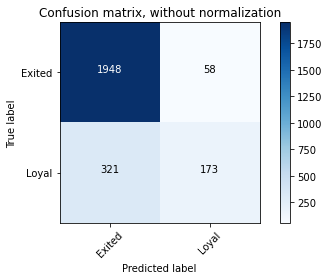

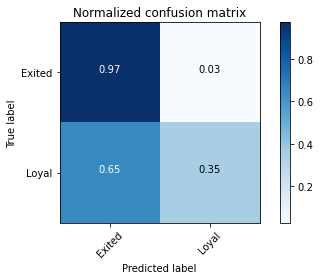

In [56]:
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

No Skill: ROC AUC=0.500
Ensemble: ROC AUC=0.829


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

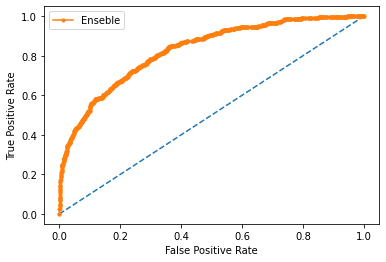

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
probs = gbModel.predict_proba(X_test)
probs = probs[:,1]
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
probs = gbModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Ensemble: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Enseble')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
